#### Zad 1. Liczba próbek (w jednym okresie) sygnału rzeczywistego 𝑠(𝑡) = 𝑠𝑖𝑛(2𝜋𝑡) wynosi 𝑁, gdzie N jest potęgą 2

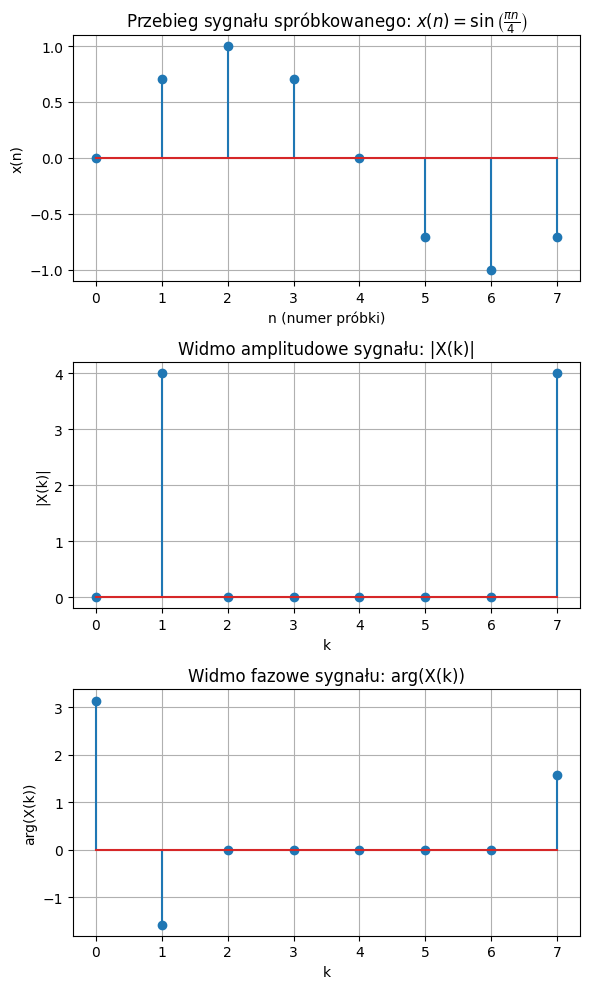

Parseval's theorem: Energy in the time domain is equal to the energy in the frequency domain.
Energy in the time domain: 4.0
Energy in the frequency domain: 4.0


In [8]:
# Zad 1a

"""
Przyjmując N = 8 wykreślić przebieg sygnału spróbkowanego, widmo amplitudowe i fazowe oraz
zweryfikować eksperymentalnie słuszność twierdzenia Parsevala.
"""

import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 8  # Number of samples
k_values = np.arange(N)  # From 0 to N-1
epsilon = 1e-10  # Threshold for the imaginary part of the DFT

# Sampled signal: s(t) = sin(2πt)
fs = 8
nT = np.arange(N) / fs  # n/fs
x_n = np.sin(2 * np.pi * nT)

# Compute the X(k) - DFT
X_k = np.zeros(N, dtype=complex)
for k in range(N):
    score = 0
    for n in range(N):
        score += np.sin(2 * np.pi * n / N) * np.exp(-1j * 2 * np.pi * k * n / N)

    # Remove the imaginary part if it is close to zero
    if abs(score.imag) < epsilon:
        score = score.real + 0j

    X_k[k] = score

# Compute the amplitude and phase of spectrum X(k)
amplitude_X_k = np.abs(X_k)
phase_X_k = np.angle(X_k)

# Graphs
fig, axs = plt.subplots(3, 1, figsize=(6, 10))

# Plot samples of the signal x(n)
axs[0].stem(k_values, x_n)
axs[0].set_title(r"Przebieg sygnału spróbkowanego: $x(n) = \sin\left(\frac{\pi n}{4}\right)$")
axs[0].set_xlabel("n (numer próbki)")
axs[0].set_ylabel("x(n)")
axs[0].grid(True)

# Plot the amplitude of X(k)
axs[1].stem(k_values, amplitude_X_k)
axs[1].set_title("Widmo amplitudowe sygnału: |X(k)|")
axs[1].set_xlabel("k")
axs[1].set_ylabel("|X(k)|")
axs[1].grid(True)

# Plot the phase of X(k)
axs[2].stem(k_values, phase_X_k)
axs[2].set_title("Widmo fazowe sygnału: arg(X(k))")
axs[2].set_xlabel("k")
axs[2].set_ylabel("arg(X(k))")
axs[2].grid(True)

plt.tight_layout()
plt.savefig("lab1_wyk1a.png")
plt.show()


# Energy in the time domain
energy_time = np.sum(np.abs(x_n)**2)

# Energy in the frequency domain (according to Parseval's theorem)
energy_freq = round((1/N) * np.sum(np.abs(X_k)**2), 3)

print("Parseval's theorem: Energy in the time domain is equal to the energy in the frequency domain.")
print("Energy in the time domain:", energy_time)
print("Energy in the frequency domain:", energy_freq)

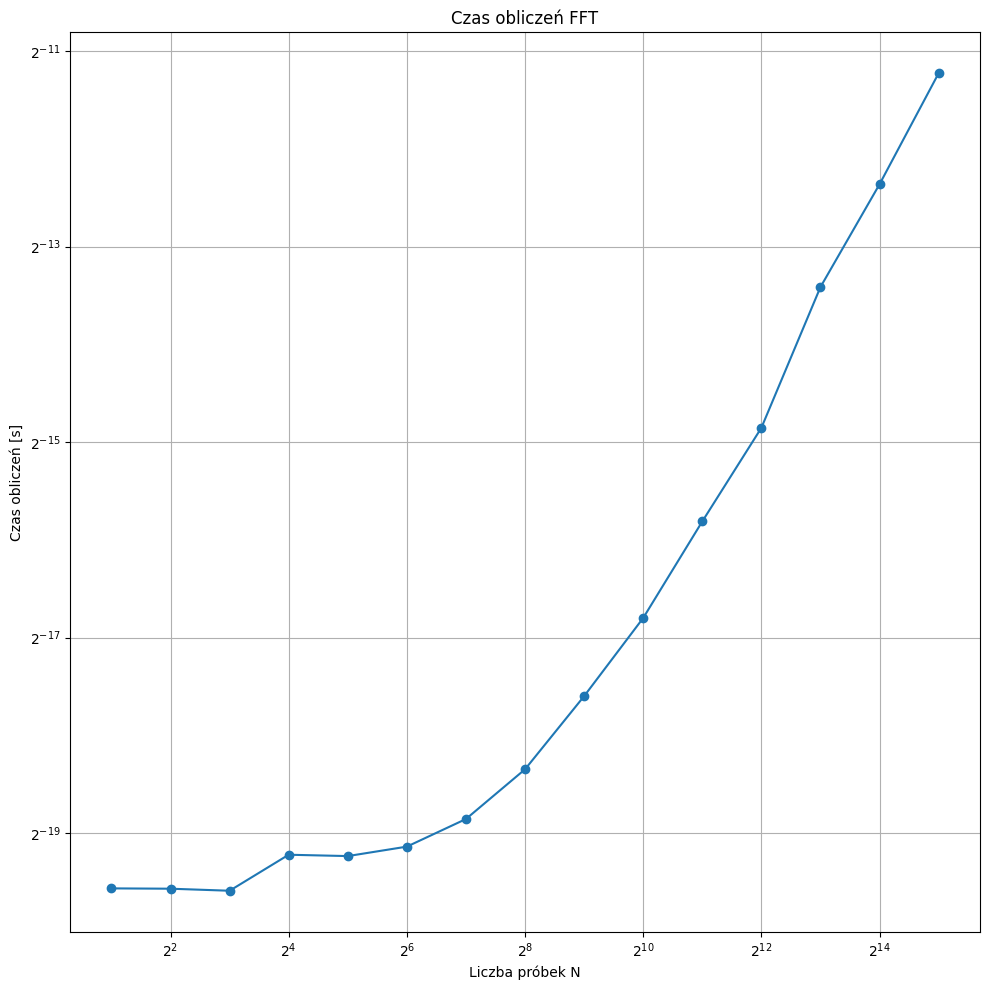

'\nWnioski:\nKształt otrzymanego wykresu jest zgodny z teoretyczną złożonością\nobliczeniową algorytmu FFT, która wynosi: O(NlogN)\n'

In [9]:
# Zad 1b

"""
Wykreślić wykres przedstawiający czas wyznaczania widma sygnału dyskretnego za pomocą
algorytmu FFT w funkcji liczby próbek N = 2^l, l ∈ N . Dobrać samodzielnie wartości N.
Skomentować kształt otrzymanego wykresu odnosząc się do teoretycznej złożoności obliczeniowej
algorytmu FFT.
"""

import numpy as np
import matplotlib.pyplot as plt
import time

# Parameters
l_values = np.arange(1, 16)
N_values = 2**l_values
times_fft = []

# FFT time measurement for different signal lengths
for N in N_values:
    n = np.arange(N)
    x_n = np.sin(2 * np.pi * n / N)
    
    if N < 2**16:
        iterations = 10000
    else:
        iterations = 1
        
    start_time = time.time()
    for i in range(iterations):
        np.fft.fft(x_n)
    elapsed_time = time.time() - start_time
    times_fft.append(elapsed_time/iterations)

# Plot the results
plt.figure(figsize=(10, 10))
plt.plot(N_values, times_fft, 'o-')
plt.xscale('log', base=2)
plt.yscale('log', base=2)
plt.xlabel('Liczba próbek N')
plt.ylabel('Czas obliczeń [s]')
plt.title('Czas obliczeń FFT')
plt.grid(True, which='both')
plt.tight_layout()
plt.savefig('lab1_wyk1b.png')
plt.show()

"""
Wnioski:
Kształt otrzymanego wykresu jest zgodny z teoretyczną złożonością
obliczeniową algorytmu FFT, która wynosi: O(NlogN)
"""